In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
carneige = pd.read_excel("/Users/jacopobinati/Desktop/GalambosC/working_strategies/performances_trading.xlsx", sheet_name="HouseOTRSun")
carneige.drop(columns=["Unnamed: 12", "Unnamed: 13", "Unnamed: 14", "Unnamed: 15", "Unnamed: 16", 
                       "Unnamed: 17", "Unnamed: 18", "Unnamed: 19", "Unnamed: 20", "index",], inplace=True)

carneige.dropna(inplace=True)
carneige['date'] = pd.to_datetime(carneige['date'], format='%Y-%m-%d')
carneige.rename(columns={"date": "Date"}, inplace=True)
carneige.info()

<class 'pandas.core.frame.DataFrame'>
Index: 70 entries, 1 to 70
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 70 non-null     datetime64[ns]
 1   equity used          70 non-null     int64         
 2   position size        70 non-null     float64       
 3   netprofit            70 non-null     float64       
 4   returns on equity    70 non-null     float64       
 5   returns on position  70 non-null     float64       
 6   leverage used        70 non-null     float64       
 7   cumulative returns   70 non-null     float64       
 8   win                  70 non-null     object        
 9   baseline             70 non-null     int64         
 10  1000$ invested       70 non-null     float64       
dtypes: datetime64[ns](1), float64(7), int64(2), object(1)
memory usage: 6.6+ KB


In [ ]:
carneige.head()
carneige['cummulative_returns_carneige'] = ((1 + carneige['returns on equity']).cumprod() - 1)*100
carneige['returns on equity'] = (carneige['returns on equity']*100).round(2)

<Axes: xlabel='Date', ylabel='cummulative_returns_carneige'>

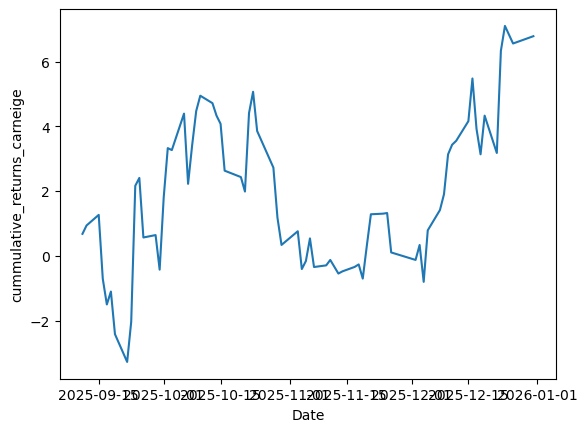

In [3]:
sns.lineplot(data=carneige, x="Date", y="cummulative_returns_carneige")

In [4]:
import yfinance as yf
spx = yf.download("^GSPC", start="2025-09-10", end="2026-01-02", auto_adjust=True)[["Close"]]
spx.columns = spx.columns.get_level_values(0)

spx = spx.reset_index()

spx["Date"] = pd.to_datetime(spx["Date"], format="%Y-%m-%d")

spx["cumulative_returns_spx"] = ((1 + spx["Close"].pct_change()).cumprod() - 1)*100
spx['returns'] = (spx["Close"].pct_change())*100
spx.to_excel("spx.xlsx")

spx.head()

[*********************100%***********************]  1 of 1 completed


Price,Date,Close,cumulative_returns_spx,returns
0,2025-09-10,6532.040039,NaN,NaN
1,2025-09-11,6587.470215,0.848589,0.848589
2,2025-09-12,6584.290039,0.799903,-0.048276
3,2025-09-15,6615.279785,1.274330,0.470662
4,2025-09-16,6606.759766,1.143896,-0.128793


In [5]:
spx

Price,Date,Close,cumulative_returns_spx,returns
0,2025-09-10,6532.040039,NaN,NaN
1,2025-09-11,6587.470215,0.848589,0.848589
2,2025-09-12,6584.290039,0.799903,-0.048276
3,2025-09-15,6615.279785,1.274330,0.470662
4,2025-09-16,6606.759766,1.143896,-0.128793
...,...,...,...,...
74,2025-12-24,6932.049805,6.123811,0.322148
75,2025-12-26,6929.939941,6.091510,-0.030436
76,2025-12-29,6905.740234,5.721033,-0.349205
77,2025-12-30,6896.240234,5.575596,-0.137567


In [6]:
aggregated = pd.merge(carneige, spx, on="Date", how="inner")
cols = ["Date", "cummulative_returns_carneige", "cumulative_returns_spx", "returns", "returns on equity"]
aggregated = aggregated[cols].sort_values("Date").reset_index(drop=True)
aggregated.rename(columns={"returns": "returns_spx",
                           "returns on equity": "returns_carneige"
                           }, inplace=True)
aggregated

,Date,cummulative_returns_carneige,cumulative_returns_spx,returns_spx,returns_carneige
0,2025-09-11,0.679000,0.848589,0.848589,0.68
1,2025-09-12,0.936738,0.799903,-0.048276,0.26
2,2025-09-15,1.264581,1.274330,0.470662,0.32
3,2025-09-16,-0.708053,1.143896,-0.128793,-1.95
4,2025-09-17,-1.502389,1.045769,-0.097017,-0.80
...,...,...,...,...,...
65,2025-12-22,3.176551,5.303859,0.643650,-1.11
66,2025-12-23,6.330591,5.783033,0.455039,3.06
67,2025-12-24,7.101529,6.123811,0.322148,0.73
68,2025-12-26,6.558615,6.091510,-0.030436,-0.51


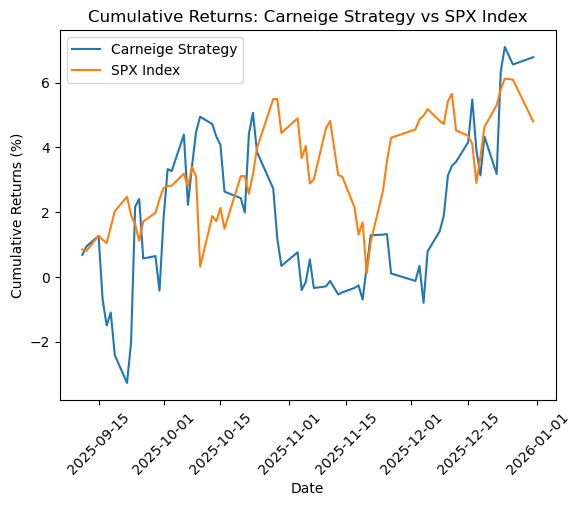

In [7]:
sns.lineplot(data=aggregated, x="Date", y="cummulative_returns_carneige", label="Carneige Strategy")
sns.lineplot(data=aggregated, x="Date", y="cumulative_returns_spx", label="SPX Index")
plt.title("Cumulative Returns: Carneige Strategy vs SPX Index")
plt.xlabel("Date")
plt.xticks(rotation=45)
plt.ylabel("Cumulative Returns (%)")
plt.legend()
plt.show()  

<Axes: >

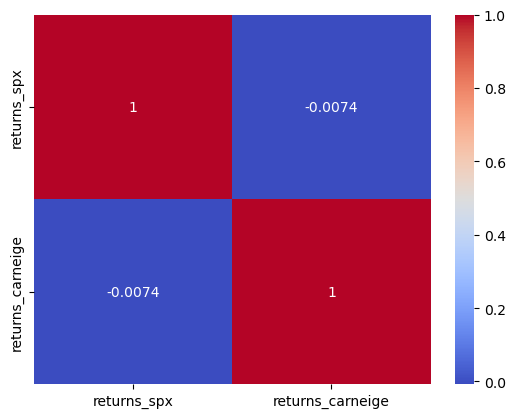

In [8]:
correlation = aggregated.drop(columns=["Date", "cummulative_returns_carneige", "cumulative_returns_spx"]).corr()
sns.heatmap(correlation, annot=True, cmap="coolwarm")

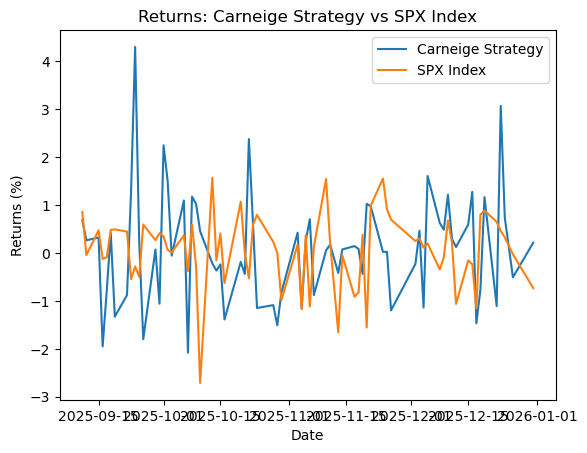

In [9]:
sns.lineplot(data=aggregated, x="Date", y="returns_carneige", label="Carneige Strategy")
sns.lineplot(data=aggregated, x="Date", y="returns_spx", label="SPX Index")
plt.title("Returns: Carneige Strategy vs SPX Index")
plt.xlabel("Date")
plt.ylabel("Returns (%)")
plt.legend()
plt.show()  

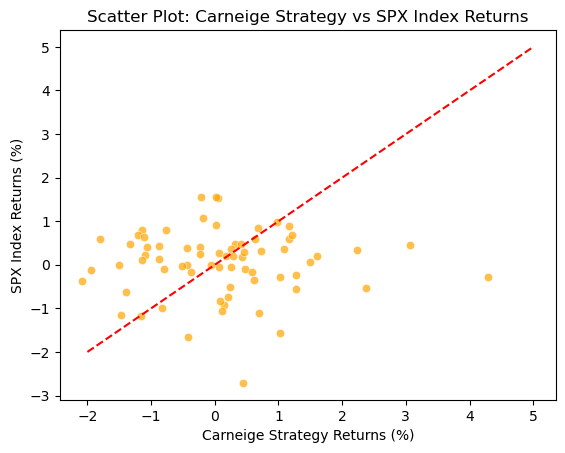

In [10]:
sns.scatterplot(data=aggregated, x="returns_carneige", y="returns_spx", color='orange', alpha=0.7)
# add a 45 degree red line
plt.plot([-2, 5], [-2, 5], color='red', linestyle='--')
plt.title("Scatter Plot: Carneige Strategy vs SPX Index Returns")
plt.xlabel("Carneige Strategy Returns (%)")
plt.ylabel("SPX Index Returns (%)")
plt.show()

In [11]:
final_date = aggregated['Date'].max()
final_values = aggregated[aggregated['Date'] == final_date][['cummulative_returns_carneige', 'cumulative_returns_spx']]
final_difference = final_values['cummulative_returns_carneige'].values[0] - final_values['cumulative_returns_spx'].values[0]
print(f"On {final_date.date()}, the Carneige Strategy outperformed the SPX Index by {final_difference:.2f}%")

equity_used = 200_000
performance_fee_rate = 0.20
performance_fee = (final_difference / 100) * equity_used * performance_fee_rate
print(f"The performance fee based on an equity of ${equity_used} is: ${performance_fee:.2f}")

On 2025-12-31, the Carneige Strategy outperformed the SPX Index by 1.99%
The performance fee based on an equity of $200000 is: $794.15
